<a href="https://colab.research.google.com/github/bijivemulakeerthi/Weather-Forecasting-using-Machine-Learning-Algorithms/blob/main/Weather_Forecasting_Using_Machine_Learning_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [ ]:

# Load dataset
dataset1 = pd.read_csv('/content/weather.csv')
dataset1

,date,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m�),PAR (�mol/m�/s),max. PAR (�mol/m�/s),Tlog (degC),OT
0,2020-01-01 00:10:00,1008.89,0.71,273.18,-1.33,86.1,6.43,5.54,0.89,3.42,...,1.02,1.60,224.3,0.0,0.0,0.0,0.0,0.0,11.45,428.1
1,2020-01-01 00:20:00,1008.76,0.75,273.22,-1.44,85.2,6.45,5.49,0.95,3.39,...,0.43,0.84,206.8,0.0,0.0,0.0,0.0,0.0,11.51,428.0
2,2020-01-01 00:30:00,1008.66,0.73,273.21,-1.48,85.1,6.44,5.48,0.96,3.39,...,0.61,1.48,197.1,0.0,0.0,0.0,0.0,0.0,11.60,427.6
3,2020-01-01 00:40:00,1008.64,0.37,272.86,-1.64,86.3,6.27,5.41,0.86,3.35,...,1.11,1.48,206.4,0.0,0.0,0.0,0.0,0.0,11.70,430.0
4,2020-01-01 00:50:00,1008.61,0.33,272.82,-1.50,87.4,6.26,5.47,0.79,3.38,...,0.49,1.40,209.6,0.0,0.0,0.0,0.0,0.0,11.81,432.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52691,2020-12-31 23:20:00,978.32,2.28,277.16,-0.80,80.0,7.20,5.76,1.44,3.67,...,0.73,1.40,180.6,0.0,0.0,0.0,0.0,0.0,13.40,433.0
52692,2020-12-31 23:30:00,978.30,2.13,277.01,-0.43,83.1,7.12,5.92,1.20,3.77,...,0.43,0.82,174.0,0.0,0.0,0.0,0.0,0.0,13.42,439.6
52693,2020-12-31 23:40:00,978.26,1.99,276.88,-0.71,82.2,7.05,5.80,1.26,3.69,...,0.38,0.76,248.9,0.0,0.0,0.0,0.0,0.0,13.45,435.2
52694,2020-12-31 23:50:00,978.26,2.07,276.95,-0.77,81.4,7.09,5.77,1.32,3.68,...,0.57,1.07,196.6,0.0,0.0,0.0,0.0,0.0,13.47,433.9


# Data preprocessing

**Convert 'date' column to datetime format and set it as the index**

In [ ]:
dataset1['date'] = pd.to_datetime(dataset1['date'], errors='coerce')
dataset1.set_index('date', inplace=True)

Check for missing values

In [ ]:
dataset1.isnull().sum()

,0
p (mbar),0
T (degC),0
Tpot (K),0
Tdew (degC),0
rh (%),0
VPmax (mbar),0
VPact (mbar),0
VPdef (mbar),0
sh (g/kg),0
H2OC (mmol/mol),0


Renaming columns to remove special characters for easier access

In [ ]:
# Renaming columns to remove special characters for easier access (optional)
dataset1.columns = dataset1.columns.str.replace('[^A-Za-z0-9 ]+', '', regex=True)

Rename the Columns

In [ ]:
# Ensuring all special characters and spaces are removed
dataset1.columns = dataset1.columns.str.replace(r'[^\w\s]', '', regex=True)
dataset1.columns = dataset1.columns.str.replace(' ', '_')  # Replacing spaces with underscores
print(dataset1.columns)  # Confirming the new names

Index(['p_mbar', 'T_degC', 'Tpot_K', 'Tdew_degC', 'rh_', 'VPmax_mbar',
       'VPact_mbar', 'VPdef_mbar', 'sh_gkg', 'H2OC_mmolmol', 'rho_gm3',
       'wv_ms', 'max_wv_ms', 'wd_deg', 'rain_mm', 'raining_s', 'SWDR_Wm',
       'PAR_molms', 'max_PAR_molms', 'Tlog_degC', 'OT'],
      dtype='object')


Exploratory Data Analysis (EDA)

In [ ]:
dataset1.describe()

,p_mbar,T_degC,Tpot_K,Tdew_degC,rh_,VPmax_mbar,VPact_mbar,VPdef_mbar,sh_gkg,H2OC_mmolmol,...,wv_ms,max_wv_ms,wd_deg,rain_mm,raining_s,SWDR_Wm,PAR_molms,max_PAR_molms,Tlog_degC,OT
count,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,...,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000
mean,989.989233,10.818241,284.796938,5.409105,72.487133,14.487046,9.676828,4.810131,6.111159,9.782341,...,1.995935,3.632807,176.850276,0.011773,25.907469,131.331822,259.863438,308.601939,21.515206,417.798615
std,9.207149,7.468671,7.616995,5.956722,19.230260,7.632960,4.023504,5.539320,2.561536,4.082684,...,43.596931,2.462467,81.194840,0.123289,111.503420,215.735116,422.786515,569.956762,7.790620,321.570015
min,955.580000,-6.440000,266.190000,-13.810000,21.160000,3.770000,2.090000,0.000000,1.300000,2.090000,...,-9999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9999.000000,6.900000,-9999.000000
25%,984.800000,4.590000,278.550000,0.777500,58.820000,8.480000,6.460000,1.170000,4.070000,6.530000,...,1.000000,1.770000,141.100000,0.000000,0.000000,0.000000,0.000000,0.000000,15.240000,415.500000
50%,990.920000,10.230000,284.320000,5.260000,75.400000,12.480000,8.890000,2.740000,5.610000,8.990000,...,1.770000,3.000000,195.500000,0.000000,0.000000,2.820000,9.670000,13.120000,20.440000,423.200000
75%,995.930000,16.180000,290.260000,9.700000,87.900000,18.420000,12.050000,6.440000,7.620000,12.200000,...,2.920000,4.850000,226.700000,0.000000,0.000000,182.900000,366.437500,434.260000,26.822500,437.100000
max,1020.070000,34.800000,309.130000,20.500000,100.000000,55.670000,24.160000,42.100000,15.400000,24.530000,...,13.770000,22.900000,360.000000,11.200000,600.000000,1115.290000,2131.760000,2498.940000,49.090000,524.200000


Distribution Plots

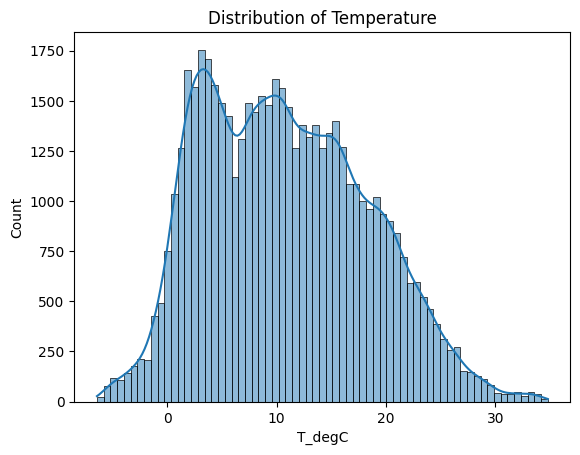

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use the correct column name 'T_degC'
sns.histplot(dataset1['T_degC'], kde=True)
plt.title('Distribution of Temperature')
plt.show()

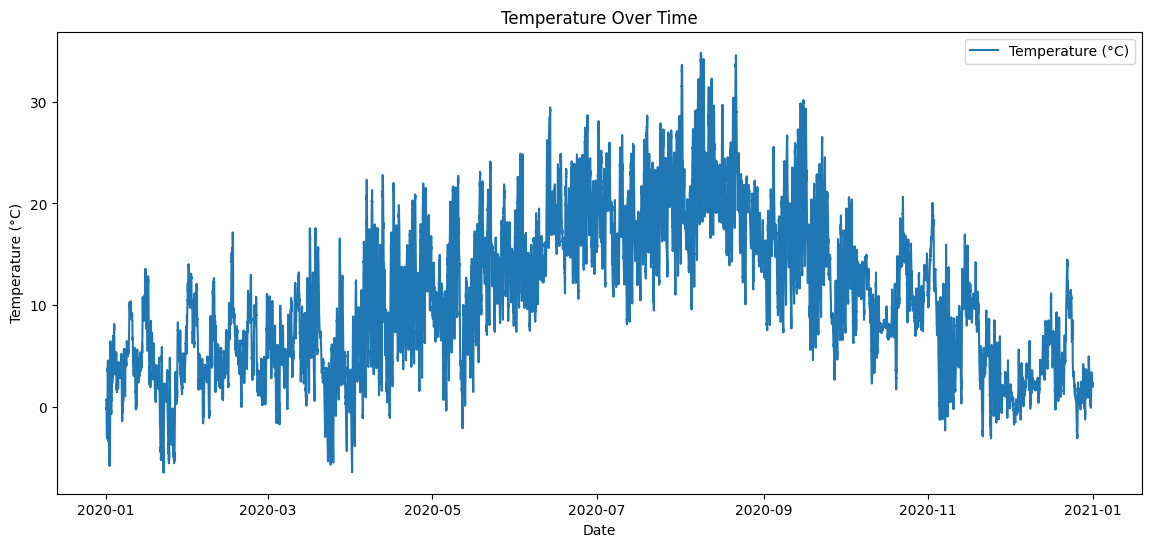

In [ ]:
import matplotlib.pyplot as plt

# Plotting the temperature over time
plt.figure(figsize=(14, 6))
plt.plot(dataset1.index, dataset1['T_degC'], label='Temperature (°C)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time')
plt.legend()
plt.show()

Feature Selection based on Correlation

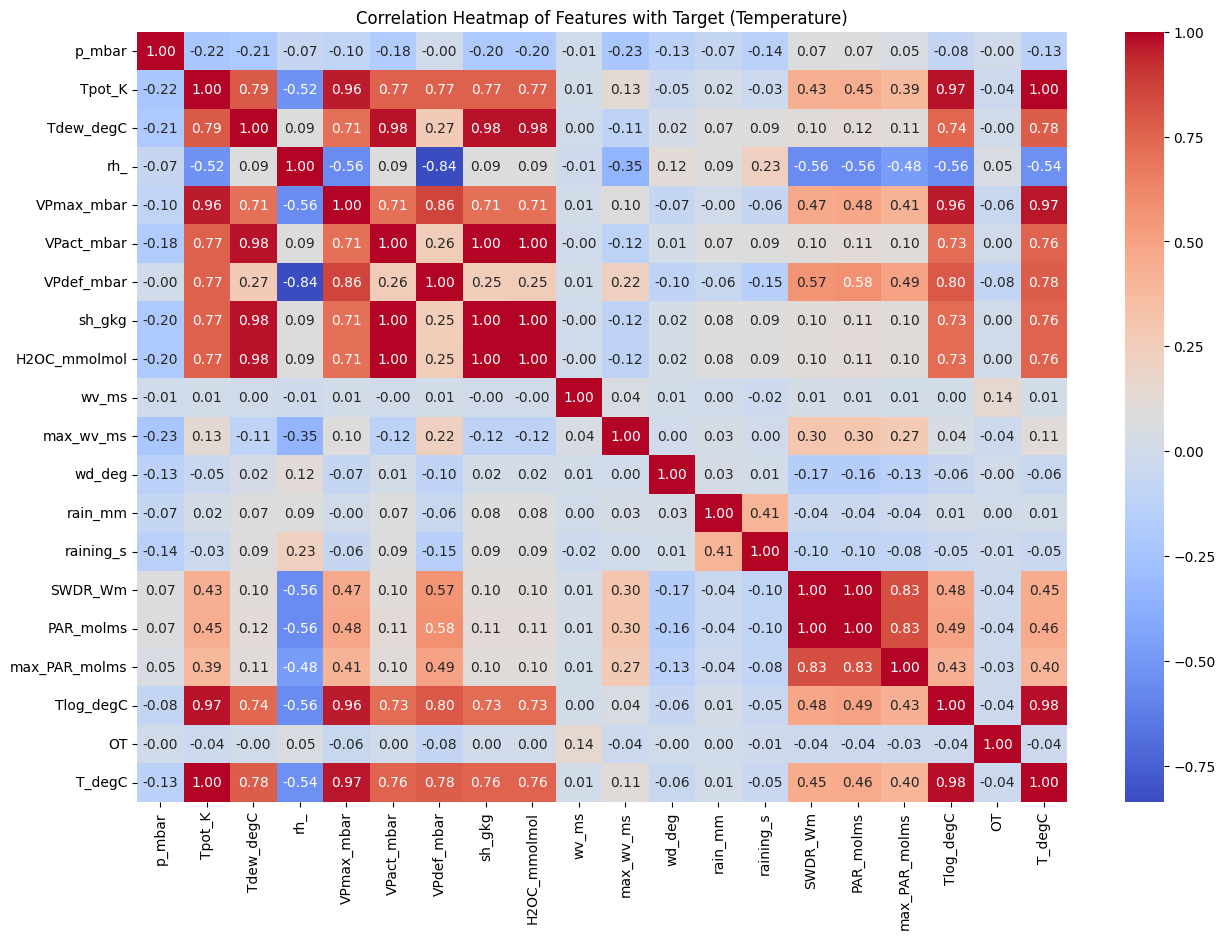

Correlation of each feature with the target variable (Temperature):

Tpot_K           0.995228
Tlog_degC        0.981562
VPmax_mbar       0.967901
Tdew_degC        0.782740
VPdef_mbar       0.779616
VPact_mbar       0.762860
H2OC_mmolmol     0.761934
sh_gkg           0.761550
PAR_molms        0.459806
SWDR_Wm          0.448607
max_PAR_molms    0.399064
max_wv_ms        0.109162
rain_mm          0.008448
wv_ms            0.007514
OT              -0.039150
raining_s       -0.048777
wd_deg          -0.061356
p_mbar          -0.127305
rh_             -0.540784
Name: T_degC, dtype: float64

Selected features based on correlation threshold: ['Tpot_K', 'Tlog_degC', 'VPmax_mbar', 'Tdew_degC', 'VPdef_mbar', 'VPact_mbar', 'H2OC_mmolmol', 'sh_gkg', 'rh_']


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Updating the feature and target column names
features = dataset1[['p_mbar', 'Tpot_K', 'Tdew_degC', 'rh_', 'VPmax_mbar',
                     'VPact_mbar', 'VPdef_mbar', 'sh_gkg', 'H2OC_mmolmol',
                     'wv_ms', 'max_wv_ms', 'wd_deg', 'rain_mm', 'raining_s',
                     'SWDR_Wm', 'PAR_molms', 'max_PAR_molms', 'Tlog_degC', 'OT']]
target = dataset1['T_degC']

# Adding target variable to features for correlation calculation
correlation_matrix = features.copy()
correlation_matrix['T_degC'] = target

# Computing correlation matrix
corr = correlation_matrix.corr()

# Plotting heatmap of correlations
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features with Target (Temperature)")
plt.show()

# Extracting correlations with the target variable
target_corr = corr['T_degC'].drop('T_degC').sort_values(ascending=False)
print("Correlation of each feature with the target variable (Temperature):\n")
print(target_corr)

# Selecting features with high correlation (absolute value > threshold)
threshold = 0.5  # Defining a correlation threshold
selected_features = target_corr[abs(target_corr) > threshold].index.tolist()
print("\nSelected features based on correlation threshold:", selected_features)

In [ ]:
# Select features and target
# Corrected feature names to match the cleaned column names in dataset1
selected_features = [
    'Tpot_K', 'Tlog_degC', 'VPmax_mbar', 'Tdew_degC',
    'VPdef_mbar', 'VPact_mbar', 'H2OC_mmolmol', 'sh_gkg', 'rh_'
]

target = 'T_degC'  # Corrected target name

X = dataset1[selected_features].dropna()
y = dataset1[target].dropna()

In [ ]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate and plot model performance


In [ ]:
def evaluate_model(model, model_name, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name} Performance:")
    print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R^2: {r2:.2f}\n")

    # Plot predicted vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name} - Predicted vs Actual')
    plt.show()

    return {'Model': model_name, 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R^2': r2}

In [ ]:
def plot_backtesting(models, X_train, y_train, X_test, y_test, dataset):
    plt.figure(figsize=(14, 8))

    # Align indices to avoid mismatches
    y_test = y_test.sort_index()
    X_test = X_test.sort_index()
    dataset = dataset.sort_index()

    # Plot Actual Values
    plt.plot(y_test.index, y_test, label='Actual', color='black', linewidth=2)

    # Plot Predictions for Each Model
    for model, name in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Ensure alignment of predictions
        plt.plot(y_test.index, y_pred, label=name)

    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.title('Model Backtesting Performance Over Time')
    plt.legend()
    plt.show()


# Initialize models


In [ ]:
models = [
    (LinearRegression(), "Linear Regression"),
    (RandomForestRegressor(random_state=42), "Random Forest"),
    (GradientBoostingRegressor(random_state=42), "Gradient Boosting"),
    (SVR(), "Support Vector Regressor"),
    (XGBRegressor(random_state=42), "XGBoost Regressor")
]

# Evaluate models


Linear Regression Performance:
MAE: 0.16, MSE: 0.05, RMSE: 0.22, R^2: 1.00



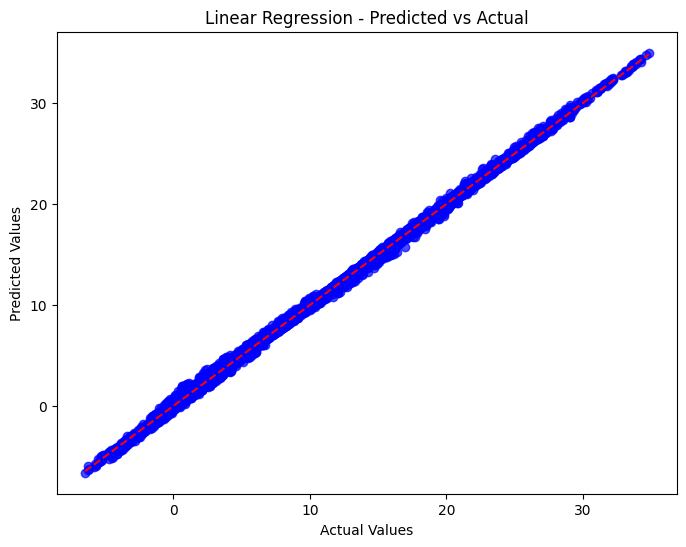

Random Forest Performance:
MAE: 0.00, MSE: 0.00, RMSE: 0.01, R^2: 1.00



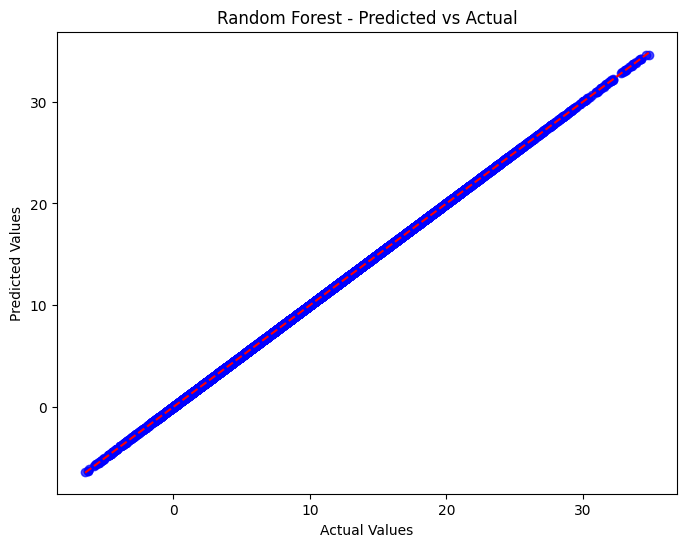

Gradient Boosting Performance:
MAE: 0.05, MSE: 0.00, RMSE: 0.06, R^2: 1.00



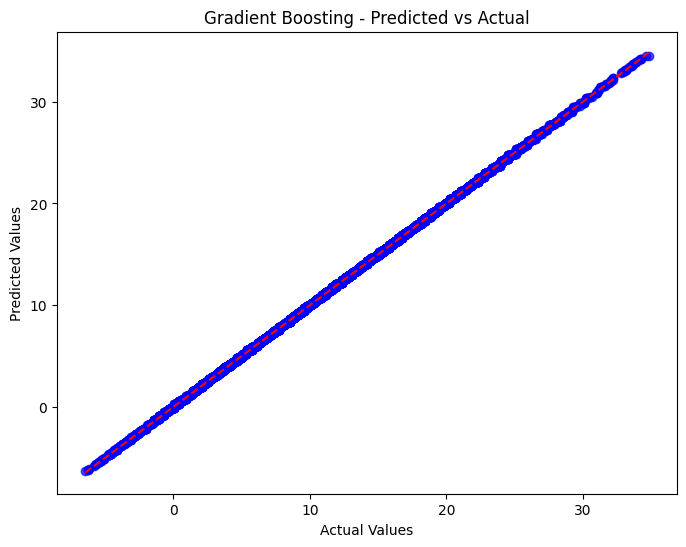

Support Vector Regressor Performance:
MAE: 0.16, MSE: 0.04, RMSE: 0.21, R^2: 1.00



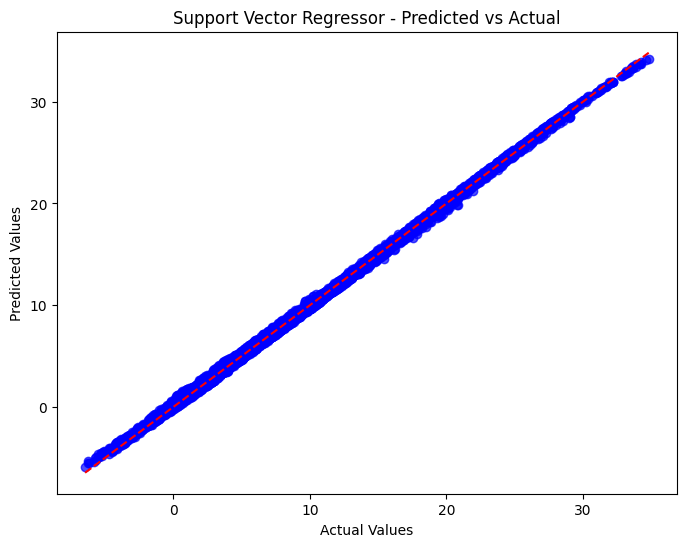

XGBoost Regressor Performance:
MAE: 0.03, MSE: 0.00, RMSE: 0.05, R^2: 1.00



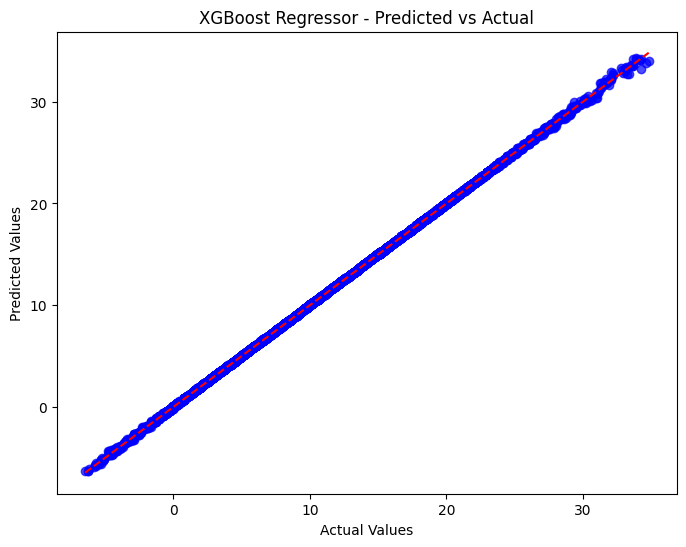

In [ ]:
results = []
for model, name in models:
    results.append(evaluate_model(model, name, X_train, y_train, X_test, y_test))


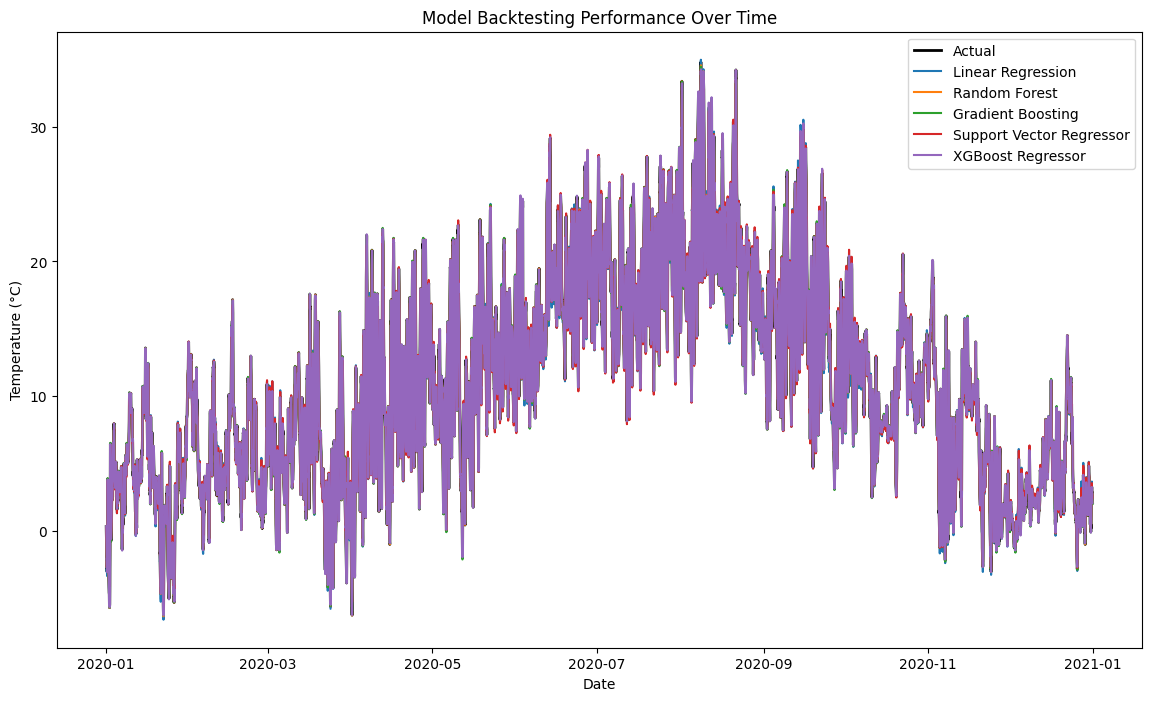

In [ ]:
# Plot Backtesting Performance
plot_backtesting(models, X_train, y_train, X_test, y_test, dataset1)


In [ ]:
# Hyperparameter tuning for Random Forest and Gradient Boosting
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [5, 10, None]}
grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=3)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
print("Best Random Forest Parameters:", grid_rf.best_params_)

param_grid_gb = {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1, 0.2], 'max_depth': [3, 5]}
grid_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, cv=3)
grid_gb.fit(X_train, y_train)
best_gb = grid_gb.best_estimator_
print("Best Gradient Boosting Parameters:", grid_gb.best_params_)


Best Random Forest Parameters: {'max_depth': None, 'n_estimators': 200}
Best Gradient Boosting Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}


Random Forest (Tuned) Performance:
MAE: 0.00, MSE: 0.00, RMSE: 0.01, R^2: 1.00



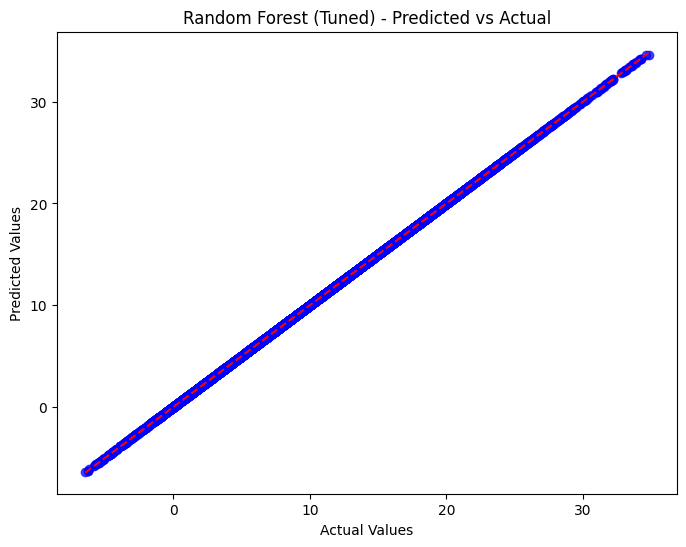

Gradient Boosting (Tuned) Performance:
MAE: 0.01, MSE: 0.00, RMSE: 0.01, R^2: 1.00



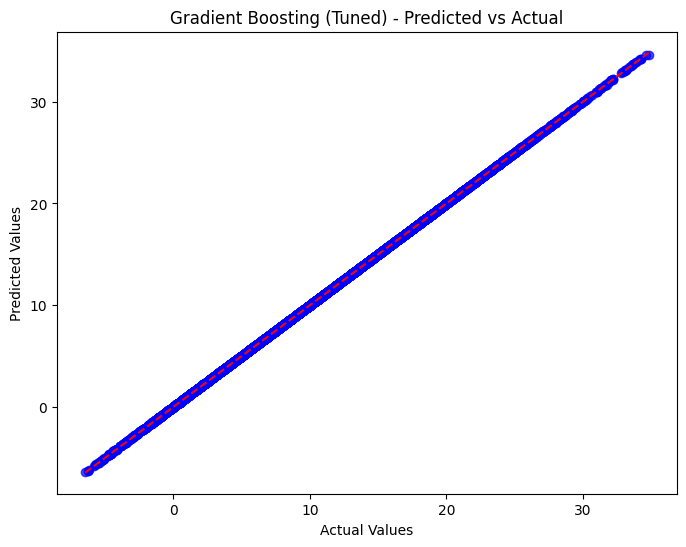

In [ ]:
# Evaluate fine-tuned models
results.append(evaluate_model(best_rf, "Random Forest (Tuned)", X_train, y_train, X_test, y_test))
results.append(evaluate_model(best_gb, "Gradient Boosting (Tuned)", X_train, y_train, X_test, y_test))

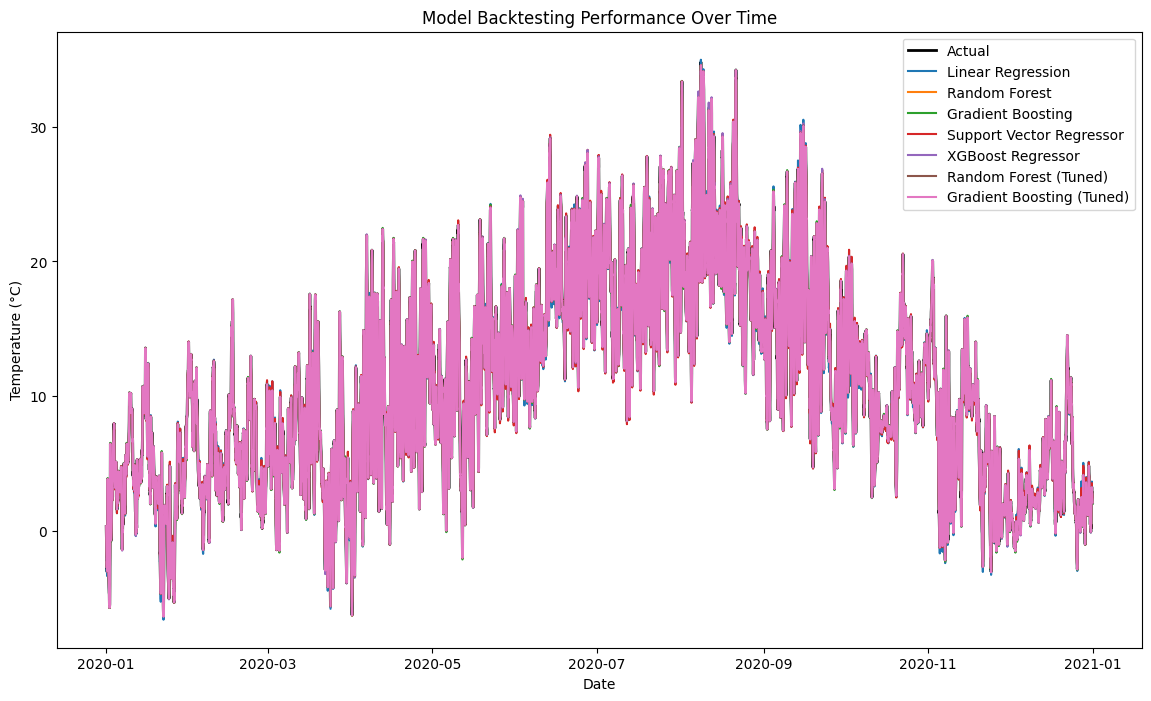

In [ ]:
# Include fine-tuned models in backtesting
models.extend([
    (best_rf, "Random Forest (Tuned)"),
    (best_gb, "Gradient Boosting (Tuned)")
])

# Plot Backtesting Performance
plot_backtesting(models, X_train, y_train, X_test, y_test, dataset1)


In [ ]:
# Summary table
results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:")
print(results_df)


Model Performance Comparison:
                      Model       MAE       MSE      RMSE       R^2
0         Linear Regression  0.158165  0.049328  0.222100  0.999115
1             Random Forest  0.002704  0.000030  0.005462  0.999999
2         Gradient Boosting  0.049410  0.004183  0.064676  0.999925
3  Support Vector Regressor  0.158029  0.042039  0.205033  0.999246
4         XGBoost Regressor  0.033038  0.002825  0.053154  0.999949


<Figure size 1000x600 with 0 Axes>

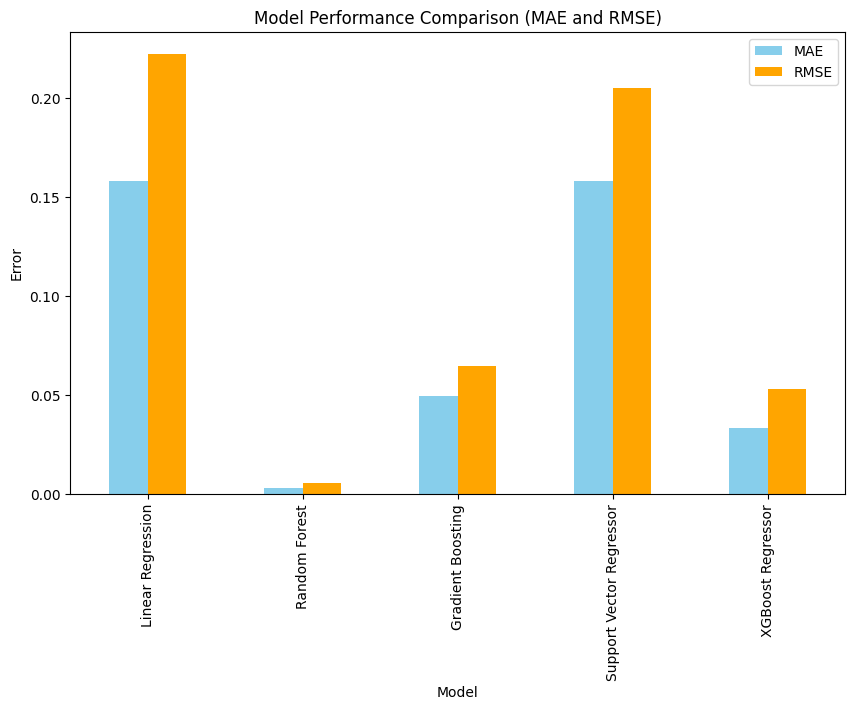

In [ ]:
# Plot summary
plt.figure(figsize=(10, 6))
results_df.set_index('Model')[['MAE', 'RMSE']].plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])
plt.title('Model Performance Comparison (MAE and RMSE)')
plt.ylabel('Error')
plt.show()